In [2]:
import pandas as pd
import numpy as nb

In [3]:
df = pd.read_csv("US_Accidents_March23.csv")

### Data Preparation and Cleaning

1. Load the file using pandas
2. Look at some information about the data and the column
3. Fix any missing or incorrect values

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
len(df.columns)

46

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericdf = df.select_dtypes(include=numerics)
len(numericdf.columns)

13

#### Percentage of missing values per column


In [10]:
df.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [11]:
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [12]:
type(missing_percentage)

pandas.core.series.Series

In [13]:
missing_percentage[missing_percentage!=0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<AxesSubplot: >

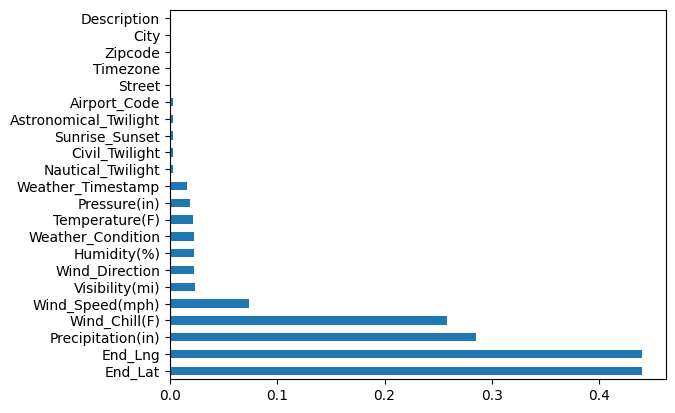

In [14]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

#### Remove columns that you don't want to use

In [15]:
df.drop(columns =['End_Lng','End_Lat'],inplace = True)


### Exploratory Data Analysis and Visualization

columns we'll analysis:

1. City
2. Start Time
3. Start Lat, Start Long
4. Temperature
5. Weather Condition

### City

In [16]:
df.City


0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [17]:
df.City.unique().shape


(13679,)

In [18]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

#### which cities have the most accidents¶


<AxesSubplot: >

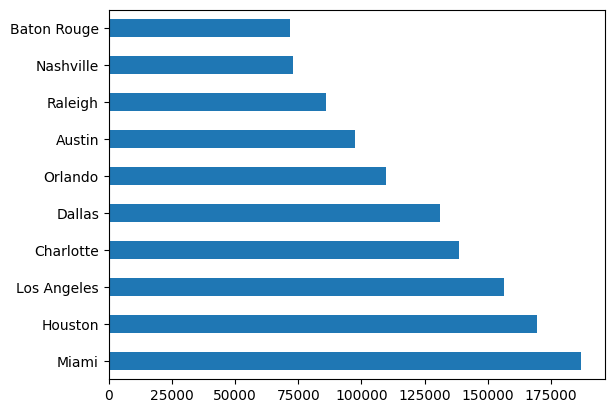

In [19]:
cities_by_accident.head(10).plot(kind ='barh')


In [20]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000]
low_accident_cities = cities_by_accident[cities_by_accident<1000]

len(high_accident_cities)

1218

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\3128680588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)


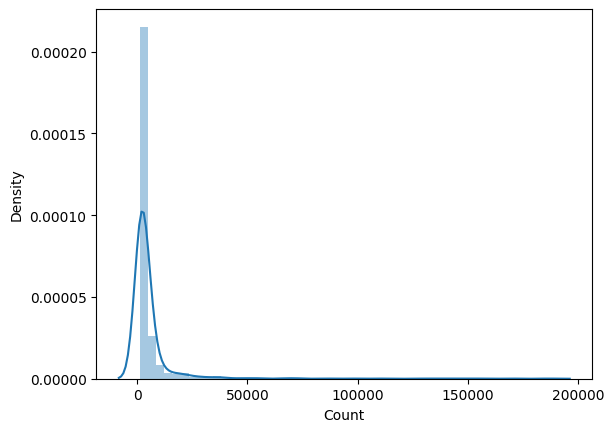

In [22]:
sns.distplot(high_accident_cities)
plt.xlabel('Count')
plt.ylabel('Density')
plt.show()

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\890788016.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


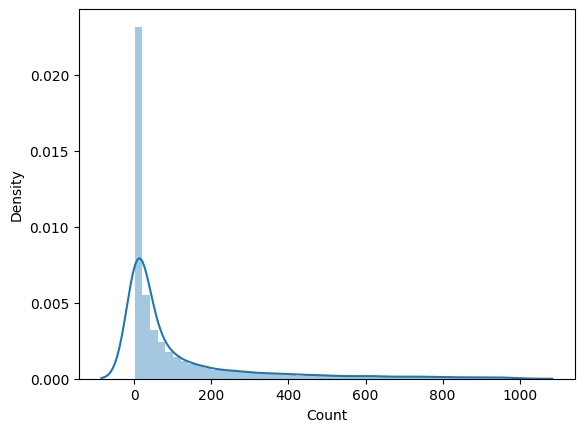

In [23]:
sns.distplot(low_accident_cities)
plt.xlabel('Count')
plt.ylabel('Density')
plt.show()

In [24]:
cities_by_accident[cities_by_accident <=10]


Lenore                          10
Clintondale                     10
Forest Knolls                   10
Bruneau                         10
Mt Hermon                       10
                                ..
Benkelman                        1
Old Appleton                     1
Wildrose                         1
Mc Nabb                          1
American Fork-Pleasant Grove     1
Name: City, Length: 4448, dtype: int64

#### Start Time

In [25]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [26]:
df.Start_Time = pd.to_datetime(df.Start_Time)


In [27]:
sns.set_style("darkgrid")

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\161640092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

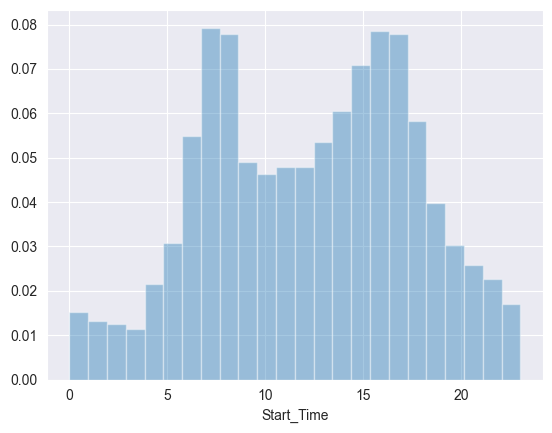

In [28]:
sns.distplot(df.Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)

- High percentage of accidents occur between 6am to 10am (probably people harry to work)
- Next highest percentage is 3pm to 6pm

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\362580169.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek,bins=7, kde=False,norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

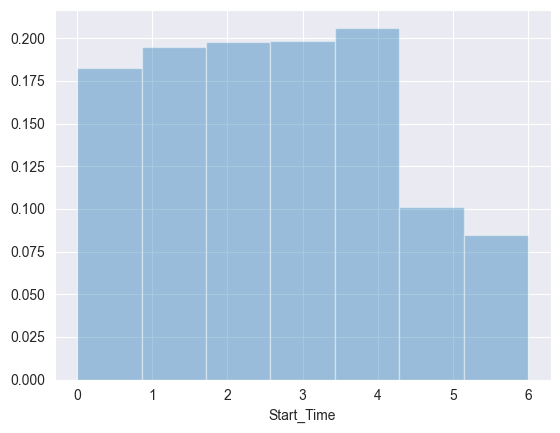

In [29]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7, kde=False,norm_hist=True)

In [30]:
df.Start_Time.dt.dayofweek == 6

0          False
1          False
2          False
3          False
4          False
           ...  
7728389    False
7728390    False
7728391    False
7728392    False
7728393    False
Name: Start_Time, Length: 7728394, dtype: bool

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\4047326446.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_Start_Time.dt.hour, bins=24, kde= False, norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

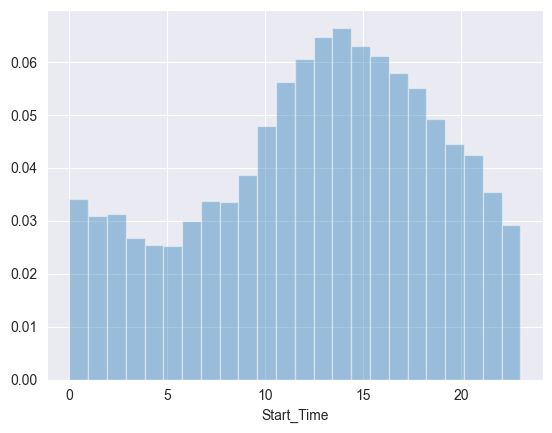

In [31]:
sundays_Start_Time = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sundays_Start_Time.dt.hour, bins=24, kde= False, norm_hist=True)

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\2798805944.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mondays_Start_Time.dt.hour, bins=24, kde= False, norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

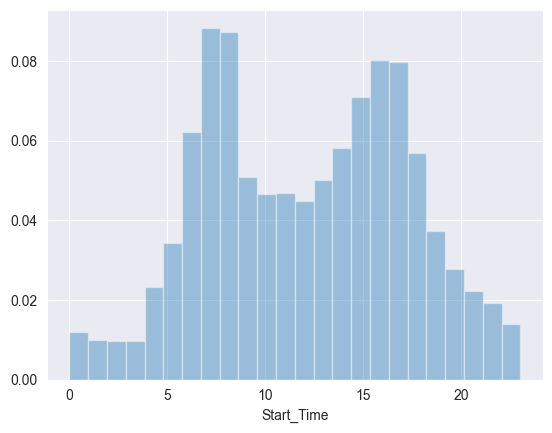

In [32]:
mondays_Start_Time = df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(mondays_Start_Time.dt.hour, bins=24, kde= False, norm_hist=True)

- On Sundays, the peak occurs between 10 am and 3 pm , unlike weekdays

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\3706678957.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde= False, norm_hist=True)


<AxesSubplot: xlabel='Start_Time'>

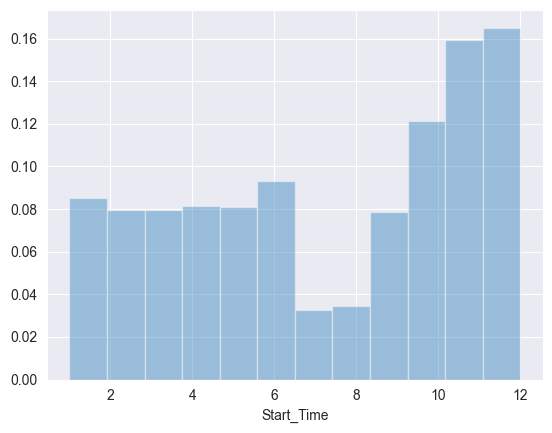

In [33]:
df_2019 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde= False, norm_hist=True)

<AxesSubplot: ylabel='Source'>

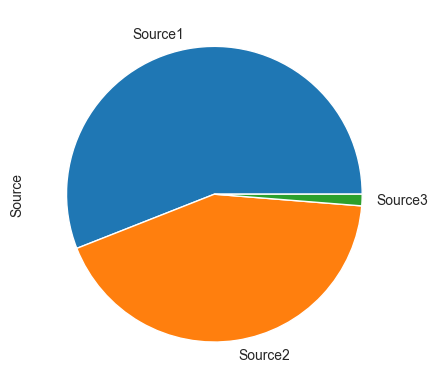

In [34]:
df.Source.value_counts().plot(kind='pie')

#### Start lattitude $ Longitude

In [35]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [36]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<AxesSubplot: xlabel='Start_Lng', ylabel='Start_Lat'>

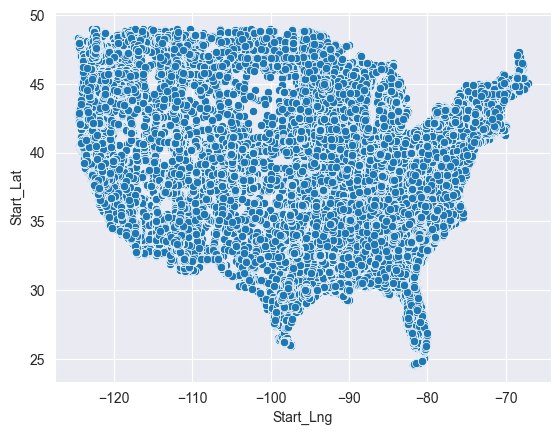

In [37]:

sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)


<AxesSubplot: xlabel='Start_Lng', ylabel='Start_Lat'>

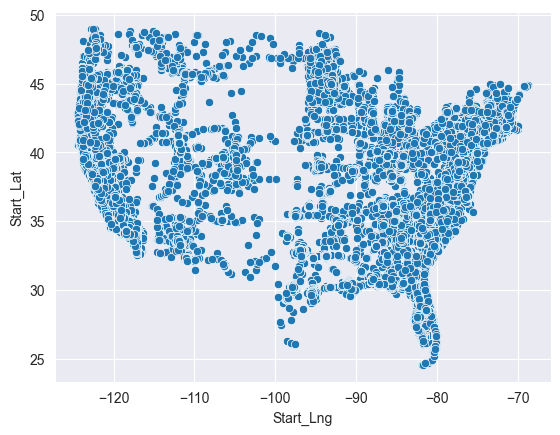

In [38]:
sns.scatterplot(x=df.Start_Lng.sample(int(0.1 * len(df['Start_Lng']))), y =df.Start_Lat.sample(int(0.1 * len(df['Start_Lat']))) )

### accident trend over the years

In [39]:
df.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

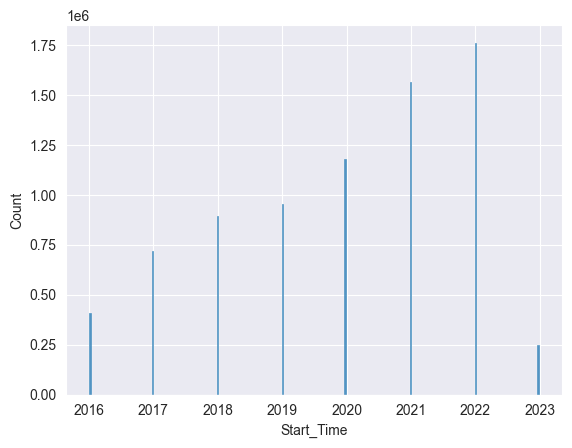

In [40]:
sns.histplot(df['Start_Time'].dt.year)


####  2023 is less because of data being available only till march

### Temperature

In [41]:
df.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [42]:
df['Temperature(F)']

0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
           ... 
7728389    86.0
7728390    70.0
7728391    73.0
7728392    71.0
7728393    79.0
Name: Temperature(F), Length: 7728394, dtype: float64

In [43]:
df['Temperature'] = (df['Temperature(F)'] - 32) * 5/9




In [44]:
df['Temperature']=(df['Temperature']*9)/5+32

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\3920285599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( (df['Temperature'] - 32 ) * (5/9)   , kde = False , norm_hist = True , color = 'purple')


<AxesSubplot: xlabel='Temperature'>

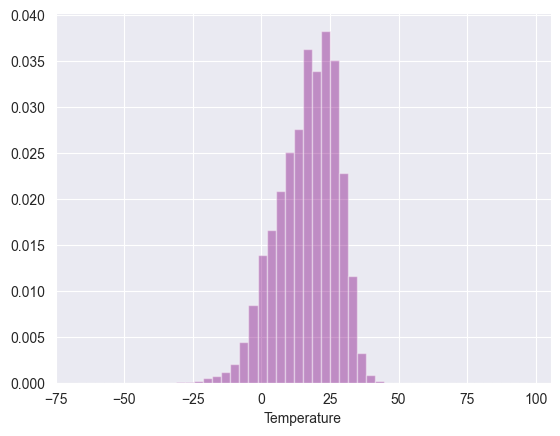

In [45]:

sns.distplot( (df['Temperature'] - 32 ) * (5/9)   , kde = False , norm_hist = True , color = 'purple') 

Most of the accidents are happends in the colder season or in winter..


In [46]:
colder = df[df['Temperature'] <= 15]['Temperature'] 
warmer = df[df['Temperature'] >15]['Temperature'] 

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\1377841482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(colder , norm_hist = True  , color = 'blue')


<AxesSubplot: xlabel='Temperature', ylabel='Density'>

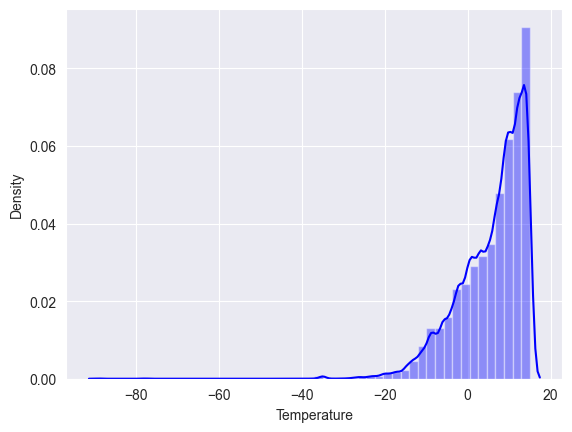

In [47]:
sns.distplot(colder , norm_hist = True  , color = 'blue') 


Most of the Accidents are occured in between the 0º to 20ºC


#### Weather

<AxesSubplot: >

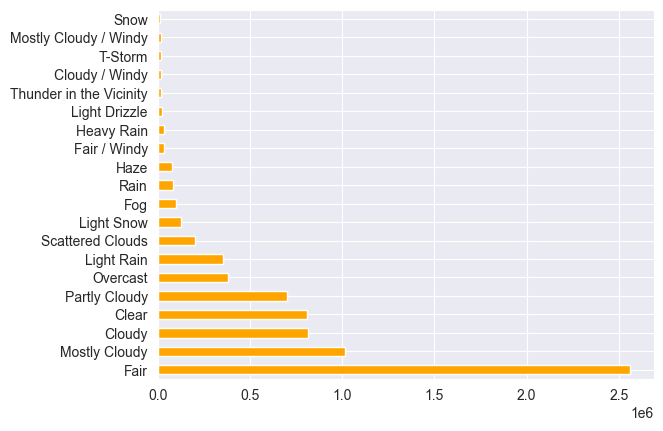

In [48]:
df.Weather_Condition.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , color = 'orange') 

so in Winter and Rainy seasons thare is more chances of occuring accidents chances


In [49]:
total_weather_conditions = df.Weather_Condition.unique()
len(total_weather_conditions) , total_weather_conditions

(145,
 array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
        'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
        'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
        'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
        'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
        'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
        'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
        'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
        'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
        'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
        'Light Rain Shower', 'Light Rain with Thunder',
        'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
        'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
        'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
        'Light Thu

C:\Users\Pronita Barman\AppData\Local\Temp\ipykernel_16464\3703866089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(accidents_per_weather , color = 'Violet')


<AxesSubplot: xlabel='Weather_Condition', ylabel='Density'>

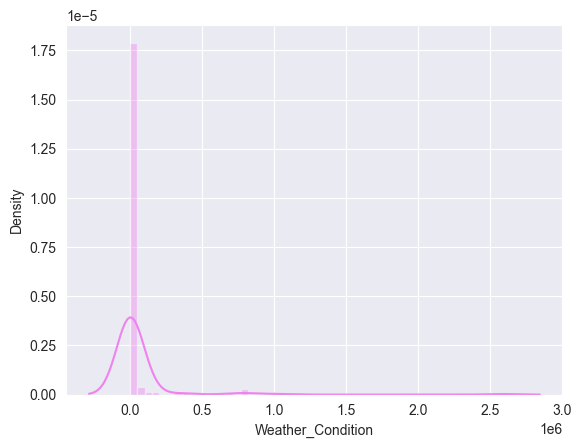

In [50]:
accidents_per_weather = df.Weather_Condition.value_counts() 
sns.distplot(accidents_per_weather , color = 'Violet') 

In [51]:
High_accident_weather = accidents_per_weather [accidents_per_weather >= 1000 ] 
low_accident_weather = accidents_per_weather [accidents_per_weather < 1000]   

len(High_accident_weather) / len(total_weather_conditions) * 100 , len(low_accident_weather) / len(total_weather_conditions) * 100

(32.41379310344827, 66.89655172413794)

32% of the weathers are having higher accidents and rest of are having lower accidents..


<AxesSubplot: ylabel='Weather_Condition'>

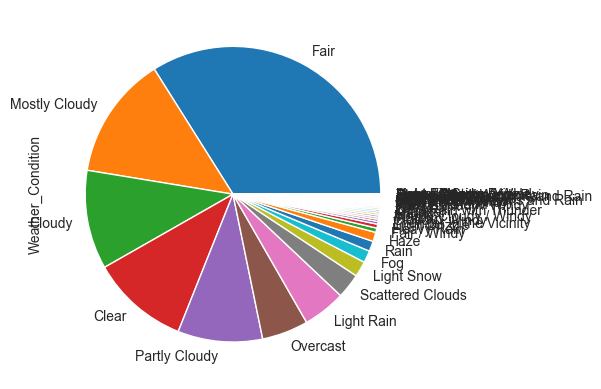

In [52]:
High_accident_weather.plot(kind='pie')


1. Data does't contain the detail about whole states of teh Use , in real USA has 52 state whare as hear are only 45 are given
2. Less that 10 % of the cities are having higher accidenet than 1000 yearly
3. Most of the accidents are happends in the morning between 6am to 10 am and 3pm to 6pm in normal working days..
4. In Weekends most of the accidents are happends in between 10am to 3pm
5. much data is missing for the 2016 and thos missing data is basically due to the source 1 coz it's have very less data for 2016
6. Most of the Accidents are Happends in the Colder season or we can say it's happends in Winter ( when low temp .)
7. less than 35 % of the weather conditions are having higher accidents than 1000 yearly